In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [2]:
df = pd.read_csv('Video_Game_Data.csv', thousands = ',')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Game Title,Weekly Sales,All Time Sales,Weeks Out
0,"Pokemon Sun/Moon (3DS)Nintendo, Role-Playing",312949,12347479,8
1,"Grand Theft Auto V (PS4)Take-Two Interactive, ...",162293,13692364,112
2,"Super Mario Maker (3DS)Nintendo, Platform",147107,1979933,6
3,"FIFA 17 (PS4)Electronic Arts, Sports",138161,9719745,15
4,Call of Duty: Infinite Warfare (PS4)Activision...,134299,6329596,10


In [4]:
weekly_sales = list(df.groupby('Game Title').mean()['Weekly Sales'])

In [5]:
all_time_sales = list(df.groupby('Game Title').max()['All Time Sales'])

In [6]:
weeks_out = list(df.groupby('Game Title').max()['Weeks Out'])

In [7]:
game_title = list(df.groupby('Game Title').mean().index)

In [8]:
genre = []
title = []
console = []
publisher = []
title2 = []

for games in game_title:
    genre.append(games.split(',')[1].strip())
    title.append(games.split(',')[0])
    console.append(games.split('(')[-1].split(')')[0])
    publisher.append(games.split('(')[-1].split(')')[-1].split(',')[0])
    title2.append(games.split('(')[0])

In [9]:
df2 = pd.DataFrame(columns= ['Game_Title', 'Genre','Console', 'Publisher', 'Weekly_Sales', 'All_Time_Sales', 'Weeks_Out'])

In [10]:
df2.Game_Title = title2
df2.Console = console
df2.Publisher = publisher
df2.Weekly_Sales = weekly_sales
df2.All_Time_Sales = all_time_sales
df2.Weeks_Out = weeks_out
df2.Genre = genre

In [11]:
df2.head()

,Game_Title,Genre,Console,Publisher,Weekly_Sales,All_Time_Sales,Weeks_Out
0,.hack//G.U. Last Recode,Role-Playing,PS4,Namco Bandai Games,86008.000000,86008,1
1,1-2-Switch,Party,NS,Nintendo,32010.285714,1927365,62
2,A Way Out,Action,PS4,Electronic Arts,46691.750000,186767,4
3,A Way Out,Action,XOne,Electronic Arts,42659.000000,42659,1
4,ABZU,Adventure,PS4,505 Games,24841.000000,24841,1


In [12]:
df2 = df2.replace({'Console': "Pokemon: Let's Go"}, {'Console': 'NS'})
df2 = df2.replace({'Publisher': "Pokemon: Let's Go"}, {'Publisher': 'Nintendo'})
df2 = df2.replace({'Genre': "Pikachu! (NS)Nintendo"}, {'Genre': 'RolePlaying'})
df2 = df2.replace({'Genre': "Eevee! (NS)Nintendo"}, {'Genre': 'RolePlaying'})

In [13]:
df2.to_csv('Final_DataFrame.csv')

In [14]:
df2.groupby('Genre').sum()

,Weekly_Sales,All_Time_Sales,Weeks_Out
Genre,,,
Action,6.279348e+06,109084176,1724
Action-Adventure,4.854889e+06,52685697,298
Adventure,1.174307e+06,3949181,347
Dokonan Desu? (3DS)Nippon Columbia,1.739600e+04,17396,1
Fighting,4.042890e+06,19617688,277
MMO,1.891830e+05,189183,5
Misc,8.143472e+05,34576468,1080
Music,1.629329e+05,889785,15
Party,4.498025e+05,7179508,79


In [15]:
pub_dummies = pd.get_dummies(df2["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df2["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df2["Console"], prefix="con")

In [16]:
df2 = df2.drop(["Publisher", "Genre", "Console"], axis=1)
df2 = pd.concat([df2, pub_dummies, gen_dummies, con_dummies], axis=1)
df2.head()

,Game_Title,Weekly_Sales,All_Time_Sales,Weeks_Out,pub_505 Games,pub_Activision,pub_Aksys Games,pub_Aqua Plus,pub_Aquaplus,pub_Arc System Works,...,gen_Strategy,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_WiiU,con_X360,con_XOne
0,.hack//G.U. Last Recode,86008.000000,86008,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1-2-Switch,32010.285714,1927365,62,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,A Way Out,46691.750000,186767,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,A Way Out,42659.000000,42659,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ABZU,24841.000000,24841,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
cleaned_dummies = []
for names in list(df2.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
a = dict(zip(list(df2.columns[5:]), cleaned_dummies))

In [26]:
df2 = df2.rename(columns={'pub_Activision': 'pub_Activision',
 'pub_Aksys Games': 'pub_Aksys_Games',
 'pub_Aqua Plus': 'pub_Aqua_Plus',
 'pub_Aquaplus': 'pub_Aquaplus',
 'pub_Arc System Works': 'pub_Arc_System_Works',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Big Ben Interactive': 'pub_Big_Ben_Interactive',
 'pub_Broccoli': 'pub_Broccoli',
 'pub_Capcom': 'pub_Capcom',
 'pub_Capcom Entertainment': 'pub_Capcom_Entertainment',
 'pub_City Interactive': 'pub_City_Interactive',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Compile Heart': 'pub_Compile_Heart',
 'pub_D3Publisher ': 'pub_D3Publisher_',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Falcom': 'pub_Falcom',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_FuRyu Corporation': 'pub_FuRyu_Corporation',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Grey Box': 'pub_Grey_Box',
 'pub_Gun Media': 'pub_Gun_Media',
 'pub_Kadokawa Games': 'pub_Kadokawa_Games',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Marvelous': 'pub_Marvelous',
 'pub_Marvelous Interactive': 'pub_Marvelous_Interactive',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Merge Games': 'pub_Merge_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Milestone': 'pub_Milestone',
 'pub_Milestone S.r.l.': 'pub_Milestone',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Natsume': 'pub_Natsume',
 'pub_Nicalis': 'pub_Nicalis',
 'pub_Nighthawk Interactive': 'pub_Nighthawk_Interactive',
 'pub_Nihon Falcom Corporation': 'pub_Nihon_Falcom_Corporation',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Nippon Columbia': 'pub_Nippon_Columbia',
 'pub_Nippon Ichi Software': 'pub_Nippon_Ichi_Software',
 'pub_PQube': 'pub_PQube',
 'pub_Ready at Dawn': 'pub_Ready_at_Dawn',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Screenlife': 'pub_Screenlife',
 'pub_Sega': 'pub_Sega',
 'pub_Sold Out': 'pub_Sold_Out',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Computer Entertainment America': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Computer Entertainment Europe': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Spike Chunsoft': 'pub_Spike_Chunsoft',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_THQ Nordic': 'pub_THQ_Nordic',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'pub_Xseed Games': 'pub_Xseed_Games',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Dokonan Desu? (3DS)Nippon Columbia': 'gen_Strategy',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_RolePlaying': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [27]:
dummy = ''
for names in a.values():
    dummy += names
    dummy += '+'
dummy

'pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Milestone_S.r.l.+pub_Mojang+pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+pub_Nintendo+pub_Nippon_Columbia+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Entertainment+pub_Sony_

In [37]:
form = ('All_Time_Sales~Weekly_Sales+Weeks_Out+pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Mojang+pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+pub_Nintendo+pub_Nippon_Columbia+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Entertainment+pub_Spike_Chunsoft+pub_Square_Enix+pub_Studio_Wildcard+pub_THQ_Nordic+pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros_Interactive_Entertainment+pub_Xseed_Games+gen_Action+gen_ActionAdventure+gen_Adventure+gen_Strategy+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+con_3DS+con_NS+con_PC+con_PS3+con_PS4+con_PSV+con_WiiU+con_X360+con_XOne')





In [38]:
lr_model = ols(formula=form, data=df2).fit()

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     8.763
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.52e-56
Time:                        15:03:04   Log-Likelihood:                -8073.1
No. Observations:                 517   AIC:                         1.633e+04
Df Residuals:                     425   BIC:                         1.672e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -6.823e+05   5.68e+05     -1.202      0.230    -1.8e+06    4.33e+05
Weekly_Sales                                  6.3983      0.558     11.457      0.000       5.301       7.496
Weeks_Out                                  4.349e+04   2275.565     19.113      0.000     3.9e+04     4.8e+04
pub_Activision                             9.319e+05   7.23e+05      1.289      0.198    -4.9e+05    2.35e+06
pub_Aksys_Games                            3.089e+05   1.79e+06      0.173      0.863    -3.2e+06    3.82e+06
pub_Aqua_Plus                             -9.651e+04   1.74e+06     -0.056      0.956   -3.51e+06    3.32e+06
pub_Aquaplus                              -2.828e+04   1.82e+06     -0.016      0.988   -3.61e+06    3.55e+06
pub_Arc_System_Works                       4.277e+05   1.34e+06      0.319      0.750   -2.21e+06    3.06e+06
pub_Atlus                                 -4100.8680   9.86e+05     -0.004      0.997   -1.94e+06    1.93e+06
pub_Bandai_Namco_Entertainment             2337.8387   8.56e+05      0.003      0.998   -1.68e+06    1.68e+06
pub_Bethesda_Softworks                    -2.634e+05   7.07e+05     -0.373      0.710   -1.65e+06    1.13e+06
pub_Big_Ben_Interactive                   -5.033e+05   1.77e+06     -0.285      0.776   -3.98e+06    2.97e+06
pub_Broccoli                               8.425e+05   1.82e+06      0.462      0.644   -2.74e+06    4.42e+06
pub_Capcom                                -2.184e+05   6.97e+05     -0.313      0.754   -1.59e+06    1.15e+06
pub_Capcom_Entertainment                   -2.38e+05   1.75e+06     -0.136      0.892   -3.69e+06    3.21e+06
pub_City_Interactive                      -4.932e+05   1.32e+06     -0.375      0.708   -3.08e+06    2.09e+06
pub_Codemasters                           -3.449e+05   1.02e+06     -0.339      0.735   -2.34e+06    1.65e+06
pub_Compile_Heart                         -2.304e+05   1.74e+06     -0.133      0.895   -3.64e+06    3.18e+06
pub_D3Publisher_                          -1.004e+06   1.74e+06     -0.576      0.565   -4.43e+06    2.42e+06
pub_Deep_Silver                           -5.766e+05   8.71e+05     -0.662      0.508   -2.29e+06    1.13e+06
pub_Electronic_Arts                         9.66e+05   6.67e+05      1.447      0.149   -3.46e+05    2.28e+06
pub_Falcom                                -5.074e+05   1.74e+06     -0.292      0.770   -3.92e+06    2.91e+06
pub_Focus_Home_Interactive                -3.694e+05   8.72e+05     -0.423      0.672   -2.08e+06    1.35e+06
pub_Frontier_Developments                  1.548e+04   1.19e+06      0.013      0.990   -2.32e+06    2.35e+06
pub_FuRyu_Corporation                     -9.504e+04   1.74e+06     -0.055      0.956   -3.51e+06    3.32e+06
pub

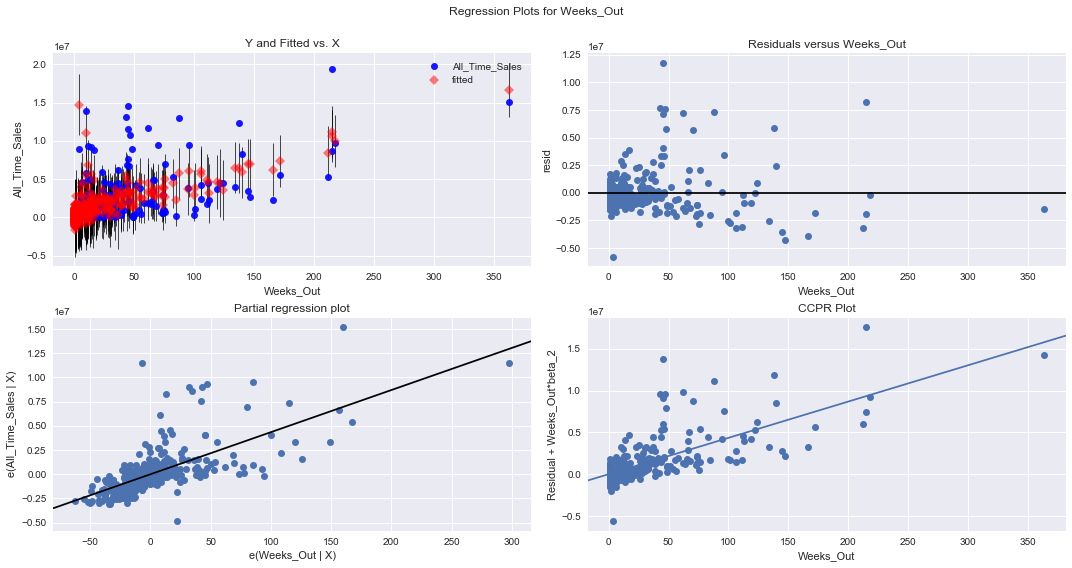

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


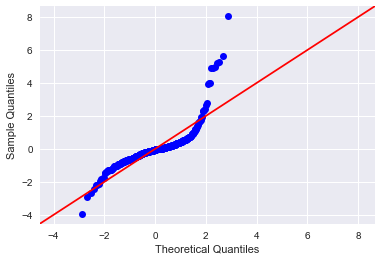

In [32]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()